In [1]:
! pip install covidcast

     |████████████████████████████████| 12.3 MB 25.4 MB/s eta 0:00:01
     |████████████████████████████████| 994 kB 69.6 MB/s eta 0:00:01
     |████████████████████████████████| 26.9 MB 62.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 65.4 MB/s eta 0:00:01
     |████████████████████████████████| 315 kB 77.7 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 79.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 37.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 69.6 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 2.2 MB/s eta 0:00:01


In [144]:
import covidcast
from datetime import date

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Reading Delphi Data

In [ ]:
data = covidcast.signal("fb-survey", "smoothed_wcovid_vaccinated_or_accept", date(2021, 3, 1), date(2021, 8, 30),
                       "state")

plt.figure(figsize=(14,4))
plt.scatter(data[data.geo_value=="ca"].time_value, data[data.geo_value=="ca"]["value"])
plt.title("fb_survey smoothed_wcovid_vaccinated_or_accept") 
plt.savefig("survey smoothed_wcovid_vaccinated_or_accept")
plt.show()

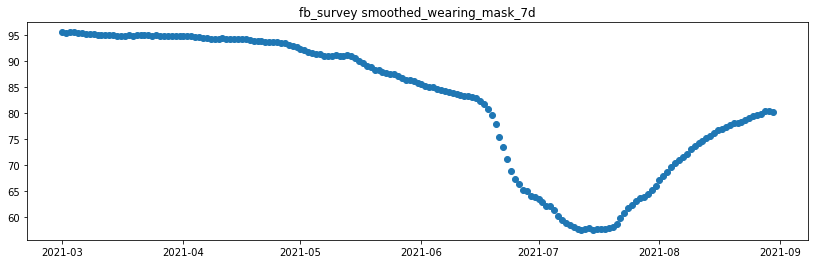

In [185]:
data = covidcast.signal("fb-survey", "smoothed_wearing_mask_7d", date(2021, 3, 1), date(2021, 8, 30),
                       "state")

plt.figure(figsize=(14,4))
plt.scatter(data[data.geo_value=="ca"].time_value, data[data.geo_value=="ca"]["value"])
plt.title("fb_survey smoothed_wearing_mask_7d") 
plt.savefig("survey smoothed_wearing_mask_7d")
plt.show()

In [186]:
data[data.geo_value=="ca"][["time_value", "value"]].to_csv("fb_survey smoothed_wearing_mask_7d", index=False)

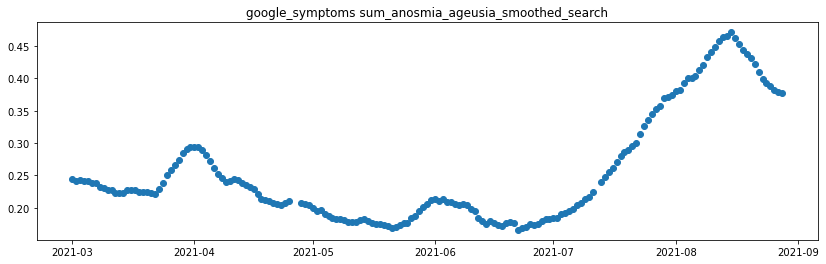

In [181]:
data = covidcast.signal("google-symptoms", "sum_anosmia_ageusia_smoothed_search", date(2021, 3, 1), date(2021, 8, 28), "state")

plt.figure(figsize=(14,4))
plt.scatter(data[data.geo_value=="ca"].time_value, data[data.geo_value=="ca"]["value"])
plt.title("google_symptoms sum_anosmia_ageusia_smoothed_search")   
plt.savefig("google_symptoms sum_anosmia_ageusia_smoothed_search")
plt.show()

In [184]:
data[data.geo_value=="ca"][["time_value", "value"]].to_csv("google_symptoms sum_anosmia_ageusia_smoothed_search.csv", index=False)

### Safegraph data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy import interpolate

### Safegraph dataset

In [151]:
# patterns_data = pd.concat([pd.read_csv("SearchofAllRecords-PATTERNS-2021_03-2021-09-24/patterns-part1.csv"),
#                            pd.read_csv("SearchofAllRecords-PATTERNS-2021_03-2021-09-24/patterns-part2.csv"),
#                            pd.read_csv("SearchofAllRecords-PATTERNS-2021_03-2021-09-24/patterns-part3.csv"),
#                            pd.read_csv("SearchofAllRecords-PATTERNS-2021_03-2021-09-24/patterns-part4.csv")])
                           
# patterns_data.head(2)

# patterns_data = patterns_data[["safegraph_brand_ids", "region", "date_range_start", "raw_visit_counts", "visits_by_day"]]
# patterns_data.to_csv("PATTERNS-2021_03-2021.csv", index=False)

In [180]:
top_brands = [{'label':"Mar",'value':"Mar"},
              {'label':"Apr",'value':"Apr"},
              {'label':"May",'value':"May"},
              {'label':"Jun",'value':"Jun"},
              {'label':"Jul",'value':"Jul"},
              {'label':"Aug",'value':"Aug"}]

"Gasoline Stations",
"General Merchandise Stores, including Warehouses",
"Grocery Stores",
"Traveler Accommodation",
"Department Stores",
"Building Material and Supplies Dealers",
"Health and Personal Care Stores",
"Other Amusement and Recreation Industries",
"Sporting Goods, Hobby, and Musical Instruments",
"Automotive Parts, Accessories, and Tire Stores",
"Clothing Stores",
"Automobile Dealers"]

In [153]:
brands_info = pd.read_csv("brand_info.csv")
brands_info = brands_info[brands_info["top_category"].isin(top_brands)][["brand_name", "safegraph_brand_id", "top_category"]].drop_duplicates()
brands_info.top_category.value_counts()

Restaurants and Other Eating Places               2011
Grocery Stores                                     758
Clothing Stores                                    429
Other Amusement and Recreation Industries          289
Gasoline Stations                                  229
Health and Personal Care Stores                    221
Traveler Accommodation                             219
Automotive Parts, Accessories, and Tire Stores     122
Building Material and Supplies Dealers              92
Automobile Dealers                                  79
Department Stores                                   66
Name: top_category, dtype: int64

In [154]:
patterns_data = pd.concat([pd.read_csv("PATTERNS-2021_08-2021.csv"), pd.read_csv("PATTERNS-2021_05-2021.csv"), 
                           pd.read_csv("PATTERNS-2021_06-2021.csv"), pd.read_csv("PATTERNS-2021_07-2021.csv"),
                           pd.read_csv("PATTERNS-2021_03-2021.csv"), pd.read_csv("PATTERNS-2021_04-2021.csv")])

In [156]:
state_data = patterns_data[patterns_data.region == "CA"]
state_data = state_data.merge(brands_info, left_on="safegraph_brand_ids", right_on="safegraph_brand_id",)

In [157]:
### Top categories 
state_data.groupby('top_category').agg({'raw_visit_counts':'sum'}).reset_index().sort_values('raw_visit_counts', ascending=False).head(20)[["top_category"]]

,top_category
9,Restaurants and Other Eating Places
5,Gasoline Stations
6,Grocery Stores
4,Department Stores
10,Traveler Accommodation
7,Health and Personal Care Stores
8,Other Amusement and Recreation Industries
2,Building Material and Supplies Dealers
3,Clothing Stores
1,"Automotive Parts, Accessories, and Tire Stores"


In [158]:
from datetime import datetime
state_data["day"] = [x.date().day  for x in pd.to_datetime(state_data["date_range_start"])]
state_data["month"] = [x.date().month  for x in pd.to_datetime(state_data["date_range_start"])]


In [159]:
state_data.head()

,safegraph_brand_ids,region,date_range_start,raw_visit_counts,visits_by_day,brand_name,safegraph_brand_id,top_category,day,month
0,SG_BRAND_0a1e9bfcb49a6541809c358da5cb205c,CA,2021-08-01T00:00:00-07:00,209,"[7,4,12,7,7,4,6,8,7,9,3,6,8,9,3,7,5,8,12,5,7,9...",Chevron,SG_BRAND_0a1e9bfcb49a6541809c358da5cb205c,Gasoline Stations,1,8
1,SG_BRAND_0a1e9bfcb49a6541809c358da5cb205c,CA,2021-08-01T00:00:00-07:00,84,"[2,2,1,4,2,2,4,3,0,3,3,2,2,1,0,3,6,4,5,3,2,2,7...",Chevron,SG_BRAND_0a1e9bfcb49a6541809c358da5cb205c,Gasoline Stations,1,8
2,SG_BRAND_0a1e9bfcb49a6541809c358da5cb205c,CA,2021-08-01T00:00:00-07:00,198,"[10,8,7,10,11,8,7,4,4,6,9,6,11,5,3,11,4,4,7,6,...",Chevron,SG_BRAND_0a1e9bfcb49a6541809c358da5cb205c,Gasoline Stations,1,8
3,SG_BRAND_0a1e9bfcb49a6541809c358da5cb205c,CA,2021-08-01T00:00:00-07:00,116,"[3,11,4,5,6,7,1,3,6,4,4,4,2,2,0,4,7,3,4,5,4,1,...",Chevron,SG_BRAND_0a1e9bfcb49a6541809c358da5cb205c,Gasoline Stations,1,8
4,SG_BRAND_0a1e9bfcb49a6541809c358da5cb205c,CA,2021-08-01T00:00:00-07:00,91,"[3,4,1,4,4,2,3,2,6,3,3,3,5,2,1,3,0,3,4,4,2,0,2...",Chevron,SG_BRAND_0a1e9bfcb49a6541809c358da5cb205c,Gasoline Stations,1,8


In [160]:
state_data.count()

safegraph_brand_ids    353586
region                 353586
date_range_start       353586
raw_visit_counts       353586
visits_by_day          353586
brand_name             353586
safegraph_brand_id     353586
top_category           353586
day                    353586
month                  353586
dtype: int64

In [161]:
# state level 
n_months = 6

def GaussianSmooth(x, c1, c3, Lambda, theta, sigma):
    x0 = 0.
    return c1 + c3 * np.cos((2*np.pi*(x/Lambda)) - theta) * np.exp(-(x - x0)**2 / (2 * sigma**2))

def plot_curve(brand_cat):
    state_data_brand = state_data[(state_data.top_category == brand_cat)][["visits_by_day", "month", "raw_visit_counts"]].sort_values("month").drop_duplicates()
    
    if state_data_brand.count()[0]>0:
        state_visits_by_day_master = []
        for m in state_data_brand.month.unique():
            xdf = state_data_brand[state_data_brand.month == m]
            state_visits_by_day = []
            for x in xdf.visits_by_day.tolist():
                cur_lst = [int(y) for y in x[1:-1].split(',')]

                if len(state_visits_by_day) == 0:
                    state_visits_by_day = [cur_lst[i] for i in range(len(cur_lst))]
                else:
                    state_visits_by_day = [(state_visits_by_day[i] + cur_lst[i]) for i in range(len(cur_lst))]

            state_visits_by_day_master.extend(state_visits_by_day)


        state_visits_by_day_master_smooth = []
        for i in np.arange(14,len(state_visits_by_day_master)):
            state_visits_by_day_master_smooth.append(np.average(state_visits_by_day_master[i-14:i]))

        plt.figure(figsize=(14,4))
        plt.scatter(np.arange(len(state_visits_by_day_master_smooth)), state_visits_by_day_master_smooth)

        state_visits_by_day_master_smooth = [int(x) for x in state_visits_by_day_master_smooth]
        print(len(state_visits_by_day_master_smooth))
        #print(state_visits_by_day_master_smooth)
        
        y = state_visits_by_day_master_smooth
        x = np.arange(len(state_visits_by_day_master_smooth))

        x_new = np.linspace(0, (n_months*30)-14, 1000)
        a_BSpline = interpolate.make_interp_spline(x, y)
        y_new = a_BSpline(x_new)

        plt.plot(x_new, y_new, 'r')

        xname = []
        for i in ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']:
            for j in np.arange(1,30, 7):
                xname.append(str(j)+str(i))
        #xname.append('Aug28')
        
        plt.ylabel("14 days average of daily visits")
        plt.xticks(np.arange(1,168,6), xname[2:], rotation=40)
        plt.title(brand_cat)
        plt.savefig(brand_cat)
        plt.show()
        return state_visits_by_day_master_smooth
    else:
        print(brand_cat)

170


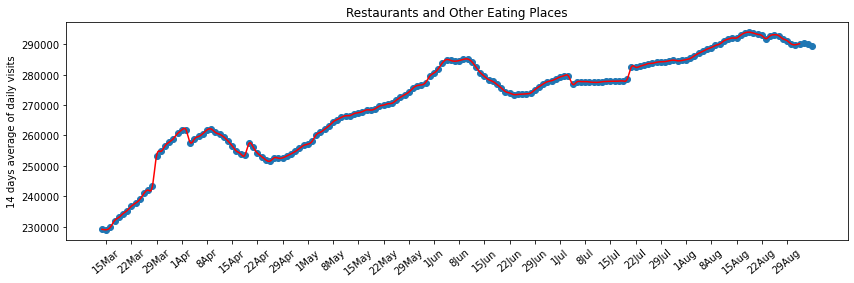

170


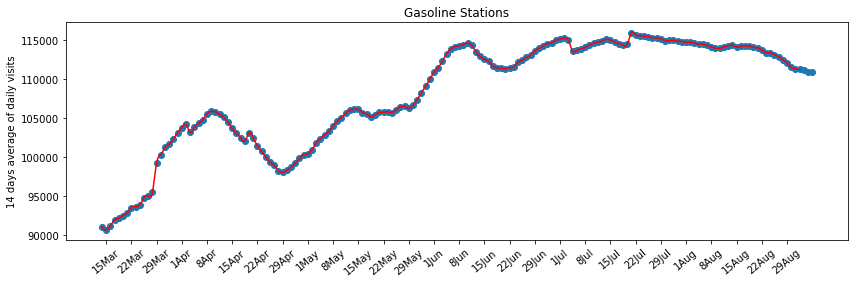

General Merchandise Stores, including Warehouses
170


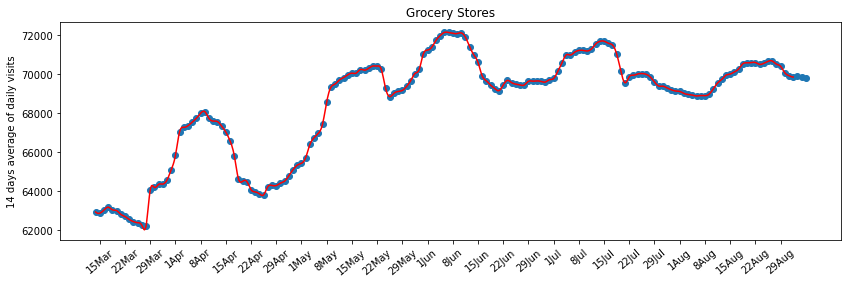

170


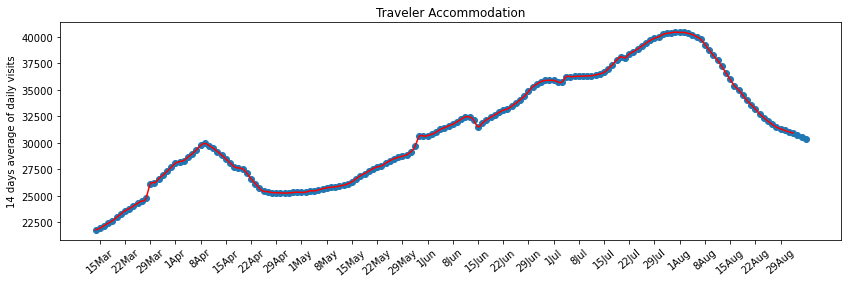

170


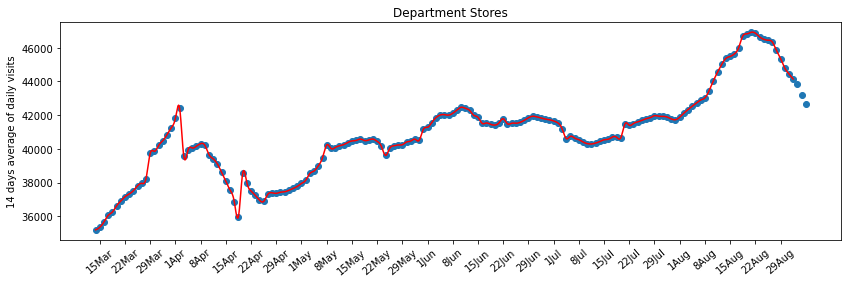

170


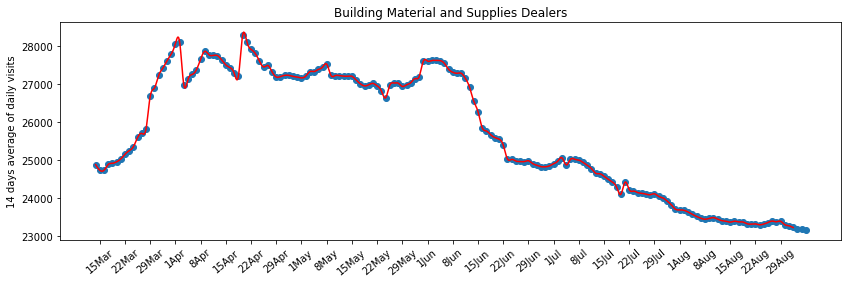

170


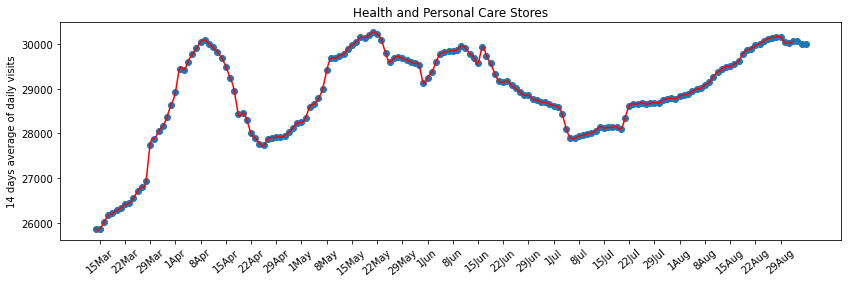

170


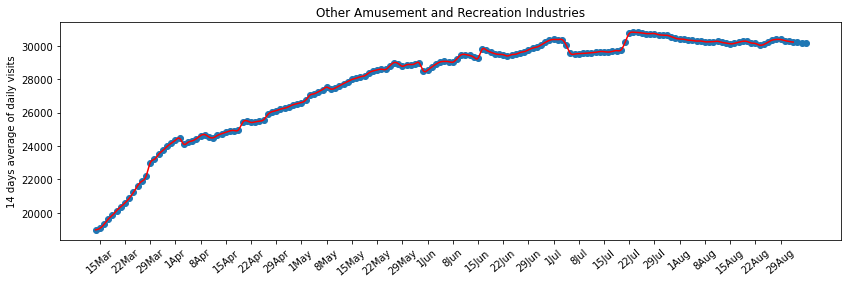

Sporting Goods, Hobby, and Musical Instruments
170


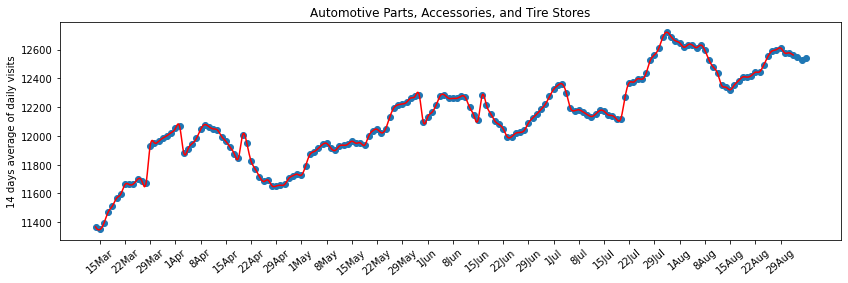

170


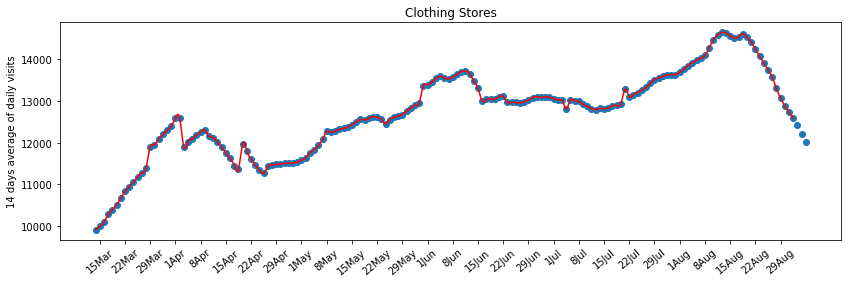

170


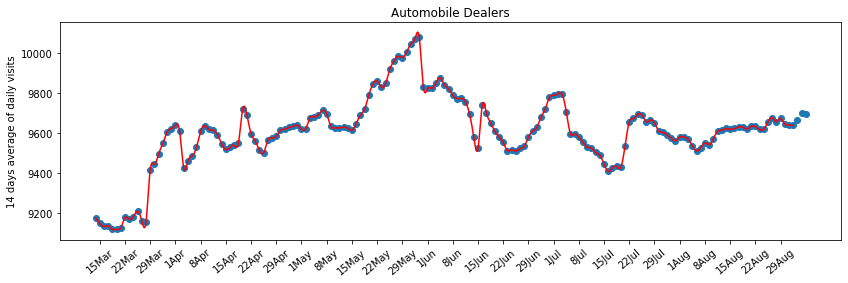

In [162]:
master_data = []
for b in top_brands:
    daily_visits = plot_curve(b)
    if daily_visits:
        b_data = [b]
        b_data.extend(daily_visits)
        master_data.append(b_data)


In [164]:
master_data_df = pd.DataFrame(master_data)
master_data_df

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,Restaurants and Other Eating Places,229194,229052,229907,232069,233093,234353,235372,236808,237758,...,293082,292817,291759,291178,290054,289789,290124,290402,290003,289461
1,Gasoline Stations,91015,90621,91087,91898,92116,92461,92805,93454,93602,...,113173,112923,112496,112152,111532,111363,111269,111194,110971,110922
2,Grocery Stores,62943,62882,63041,63189,63052,63012,62822,62710,62559,...,70671,70691,70532,70420,70088,69936,69866,69906,69877,69840
3,Traveler Accommodation,21778,21926,22161,22403,22631,22951,23272,23567,23778,...,32020,31725,31458,31302,31146,31015,30906,30737,30555,30379
4,Department Stores,35194,35346,35664,36051,36250,36620,36903,37156,37321,...,46450,46357,45858,45364,44799,44447,44147,43835,43174,42642
5,Building Material and Supplies Dealers,24879,24730,24730,24881,24912,24950,25027,25151,25243,...,23358,23396,23378,23391,23302,23272,23227,23195,23180,23167
6,Health and Personal Care Stores,25853,25867,26005,26159,26206,26273,26322,26405,26433,...,30121,30145,30165,30156,30041,30021,30060,30065,29992,29989
7,Other Amusement and Recreation Industries,18990,19078,19313,19630,19855,20138,20369,20596,20873,...,30202,30328,30368,30365,30302,30249,30212,30219,30183,30170
8,"Automotive Parts, Accessories, and Tire Stores",11367,11348,11393,11470,11512,11566,11595,11661,11661,...,12552,12590,12599,12611,12576,12577,12562,12549,12529,12538
9,Clothing Stores,9909,9988,10095,10278,10394,10512,10670,10828,10939,...,13747,13574,13300,13070,12882,12728,12581,12429,12198,12025


In [165]:
x = ['Mar']*20
x.extend(['Apr']*30)
x.extend(['May']*30)
x.extend(['Jun']*30)
x.extend(['Jul']*30)
x.extend(['Aug']*30)

y = []
y.extend(np.arange(11,31))
y.extend(np.arange(1,31))
y.extend(np.arange(1,31))
y.extend(np.arange(1,31))
y.extend(np.arange(1,31))
y.extend(np.arange(1,31))
len(y)

170

In [166]:
xdf= pd.DataFrame(np.transpose(master_data))
xdf.columns = np.array(xdf)[0]
xdf = xdf.drop(index=0, axis=0)
xdf

,Restaurants and Other Eating Places,Gasoline Stations,Grocery Stores,Traveler Accommodation,Department Stores,Building Material and Supplies Dealers,Health and Personal Care Stores,Other Amusement and Recreation Industries,"Automotive Parts, Accessories, and Tire Stores",Clothing Stores,Automobile Dealers
1,229194,91015,62943,21778,35194,24879,25853,18990,11367,9909,9176
2,229052,90621,62882,21926,35346,24730,25867,19078,11348,9988,9147
3,229907,91087,63041,22161,35664,24730,26005,19313,11393,10095,9132
4,232069,91898,63189,22403,36051,24881,26159,19630,11470,10278,9136
5,233093,92116,63052,22631,36250,24912,26206,19855,11512,10394,9117
...,...,...,...,...,...,...,...,...,...,...,...
166,289789,111363,69936,31015,44447,23272,30021,30249,12577,12728,9640
167,290124,111269,69866,30906,44147,23227,30060,30212,12562,12581,9638
168,290402,111194,69906,30737,43835,23195,30065,30219,12549,12429,9666
169,290003,110971,69877,30555,43174,23180,29992,30183,12529,12198,9699


In [167]:
xdf["Month"] = x
xdf["Day"] = y

In [168]:
xdf

,Restaurants and Other Eating Places,Gasoline Stations,Grocery Stores,Traveler Accommodation,Department Stores,Building Material and Supplies Dealers,Health and Personal Care Stores,Other Amusement and Recreation Industries,"Automotive Parts, Accessories, and Tire Stores",Clothing Stores,Automobile Dealers,Month,Day
1,229194,91015,62943,21778,35194,24879,25853,18990,11367,9909,9176,Mar,11
2,229052,90621,62882,21926,35346,24730,25867,19078,11348,9988,9147,Mar,12
3,229907,91087,63041,22161,35664,24730,26005,19313,11393,10095,9132,Mar,13
4,232069,91898,63189,22403,36051,24881,26159,19630,11470,10278,9136,Mar,14
5,233093,92116,63052,22631,36250,24912,26206,19855,11512,10394,9117,Mar,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,289789,111363,69936,31015,44447,23272,30021,30249,12577,12728,9640,Aug,26
167,290124,111269,69866,30906,44147,23227,30060,30212,12562,12581,9638,Aug,27
168,290402,111194,69906,30737,43835,23195,30065,30219,12549,12429,9666,Aug,28
169,290003,110971,69877,30555,43174,23180,29992,30183,12529,12198,9699,Aug,29


In [169]:
xdf.to_csv("Top_Categories_6months_daily_visits_California.csv", index=False)

## Merging the Safegraph data with Delphi Data

In [12]:
# Merging the Safegraph data with Delphi data on state column
patterns_data_1["region_l"] = [x.lower() for x in patterns_data_1.region]

merged_data = patterns_data_1.merge(data, left_on="region_l", right_on="geo_value")
merged_data.head(2)

,placekey,parent_placekey,location_name,street_address,city,region,postal_code,safegraph_brand_ids,brands,date_range_start,...,issue,lag,missing_value,missing_stderr,missing_sample_size,value,stderr,sample_size,geo_type,data_source
0,zzw-222@8fc-63c-m6k,NaN,Sunday's Metal Building Systems,18962 US Highway 84 E,Rusk,TX,75785,NaN,NaN,2020-06-01T00:00:00-05:00,...,2021-01-14,227,0,5,5,0.16,None,None,state,google-symptoms
1,zzw-222@8fc-63c-m6k,NaN,Sunday's Metal Building Systems,18962 US Highway 84 E,Rusk,TX,75785,NaN,NaN,2020-06-01T00:00:00-05:00,...,2021-01-14,226,0,5,5,0.17,None,None,state,google-symptoms


In [28]:
#state_data = merged_data[merged_data.region == "CA"]

In [29]:
state_data = patterns_data[patterns_data.region == "CA"]
         

In [9]:
state_data[['raw_visit_counts', 'visits_by_day']].dropna().drop_duplicates().head(2)

,raw_visit_counts,visits_by_day
7,13,"[0,1,2,2,0,0,0,1,0,0,0,0,0,1,1,1,2,2,0,0,0,0,0..."
24,3,"[0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."



## State level aggregation or Country level?

In [ ]:
# state level 
xdf = state_data[(state_data.brands == "Pizza Hut")
                ][["visits_by_day", "raw_visit_counts", "city"]].drop_duplicates().sort_values(
    "raw_visit_counts", ascending=False)

state_visits_by_day = []
for x in xdf.visits_by_day.tolist():
    cur_lst = [int(y) for y in x[1:-1].split(',')]
    if len(state_visits_by_day) == 0:
        state_visits_by_day = [cur_lst[i] for i in range(len(cur_lst))]
    else:
        state_visits_by_day = [(state_visits_by_day[i] + cur_lst[i]) for i in range(len(cur_lst))]

from scipy.optimize import curve_fit
def func(x, a, b, c):
     return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, np.arange(len(state_visits_by_day)), state_visits_by_day)
xdata = np.arange(len(state_visits_by_day))

plt.scatter(np.arange(len(state_visits_by_day)), state_visits_by_day)
plt.plot(xdata, func(xdata, *popt), 'r-')
plt.show()

In [ ]:
# state level 
xdf = state_data[(state_data.brands == "Subway")
                ][["visits_by_day", "raw_visit_counts", "city"]].drop_duplicates().sort_values(
    "raw_visit_counts", ascending=False)

state_visits_by_day = []
for x in xdf.visits_by_day.tolist():
    cur_lst = [int(y) for y in x[1:-1].split(',')]
    if len(state_visits_by_day) == 0:
        state_visits_by_day = [cur_lst[i] for i in range(len(cur_lst))]
    else:
        state_visits_by_day = [(state_visits_by_day[i] + cur_lst[i]) for i in range(len(cur_lst))]

from scipy.optimize import curve_fit
def func(x, a, b, c):
     return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, np.arange(len(state_visits_by_day)), state_visits_by_day)
xdata = np.arange(len(state_visits_by_day))

plt.scatter(np.arange(len(state_visits_by_day)), state_visits_by_day)
plt.plot(xdata, func(xdata, *popt), 'r-')
plt.show()

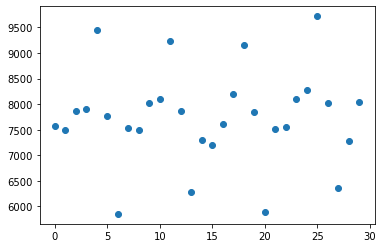

In [78]:
# everything (at country level)
xdf = patterns_data_1[(patterns_data_1.brands == "Pizza Hut")
                ][["visits_by_day", "raw_visit_counts", "city"]].drop_duplicates().sort_values(
    "raw_visit_counts", ascending=False)

state_visits_by_day = []
for x in xdf.visits_by_day.tolist():
    cur_lst = [int(y) for y in x[1:-1].split(',')]
    if len(state_visits_by_day) == 0:
        state_visits_by_day = [cur_lst[i] for i in range(len(cur_lst))]
    else:
        state_visits_by_day = [(state_visits_by_day[i] + cur_lst[i]) for i in range(len(cur_lst))]

plt.scatter(np.arange(len(state_visits_by_day)), state_visits_by_day)
plt.show()